### Install library

In [ ]:
# install the clean-text library
!pip install clean-text

# install the praw library
!pip install praw

# install the spacy library
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en_core_web_sm

# install pyldavis for interactive topic model visualization
!pip install pyldavis

# !pip install pyLDAvis

# !pip install transformers
# !pip install torch
# !pip install nltk
# !pip install praw

%matplotlib notebook
%matplotlib inline

     --------------------------------------- 12.8/12.8 MB 18.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2023-04-02 01:48:17.487405: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-02 01:48:17.487451: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 01:48:21.617131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-02 01:48:21.617803: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-04-02 01:48:21.618344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-04-02 01:48:21.618816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

### Import library

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# import torch
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from nltk import FreqDist
from PIL import Image
import requests
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# choose the svm as the model
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [21]:
import html
import nltk
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as mat

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from PIL import Image
import requests
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator


import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('omw-1.4')
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 16})
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MaxNLocator
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Logistics Regression
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# decision tree
from sklearn.tree import DecisionTreeClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.decomposition import NMF
from nltk import FreqDist
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# 1: Part 1: Sentiment Modeling 



In [ ]:
# read data
df = pd.read_csv('sentiment_analysis.csv')
df.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


In [ ]:
print('Total number of reddits:', df.shape[0])
# Check data balance 
df['label'].value_counts()

Total number of reddits: 550391


1    371341
0    179050
Name: label, dtype: int64

## 1.1 Text Cleaning:


1.   Remove Emoji
2.   Remove URL
3.   Remove User tagsConvert case to lowercase
4.   Convert case to lowercase 
5.   Remove punctuations
6.   Remove stopwords 
7.   Lemmatization
8.   Tokonization


In [ ]:
import re
# Remove all emoji
# reference: https://studymachinelearning.com/text-preprocessing-handle-emoji-emoticon/
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', string)


In [ ]:
# Remove all URL
def remove_url(string):
    return re.sub('http\S+|www\S+|https\S+','', string)


<>:3: DeprecationWarning: invalid escape sequence \S
<>:3: DeprecationWarning: invalid escape sequence \S
C:\Users\JCJen\AppData\Local\Temp\ipykernel_1036\2977143715.py:3: DeprecationWarning: invalid escape sequence \S
  return re.sub('http\S+|www\S+|https\S+','', string)


In [ ]:
import string
# remove user tags 
def remove_tags(text):
    entity_prefixes = ['@']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [ ]:
import string

# remove emoji
df['text']=df['text'].apply(remove_emoji)
# remove url 
df['text']=df['text'].apply(remove_url)
# remove user tags 
df['text']=df['text'].apply(remove_tags)
# Convert to lowercase
df['text'] = df['text'].str.lower()

# remove punctuations
df['text']= df['text'].str.replace('[^\w\s]','')

<>:13: DeprecationWarning: invalid escape sequence \w
<>:13: DeprecationWarning: invalid escape sequence \w
C:\Users\JCJen\AppData\Local\Temp\ipykernel_1036\2396916799.py:13: DeprecationWarning: invalid escape sequence \w
  df['text']= df['text'].str.replace('[^\w\s]','')


In [ ]:
# tokenize the string and remove stopwords
# !pip install nltk
# !pip install wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tongfeili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tongfeili/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tongfeili/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import re
import string

# remove non English words
df = df[df.text.map(lambda x: x.isascii())]

# remove punctuation
def remove_punct(texts):
    texts  = "".join([char for char in texts if char not in string.punctuation])
    texts = re.sub('[0-9]+', '', texts)
    return texts

df['text'] = df['text'].apply(lambda x: remove_punct(x))

In [ ]:
# nlp=spacy.load('en_core_web_lg')
stop_words=stopwords.words('english')
stop_words.append('rt')
stop_words.append('im')
stop_words.append('iam')
stop_words.append('lol')


keep_word = ["not", "mustn","mustn't","shouldn't","shouldn"]
for i in keep_word:
  stop_words.remove(i)


lemmatizer = WordNetLemmatizer()

def token(text):
    # tokenization
    t = RegexpTokenizer(r'\w+').tokenize(text)
    # removing stop words
    rm_s = []
    for w in t:
        if w not in stop_words:
            rm_s.append(w)
    l = []
    for w in rm_s:
        l.append(lemmatizer.lemmatize(w))
    return (' '.join(l))

df['text']=df['text'].apply(token)

In [ ]:
df

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeder crown...,1
1,7.680980e+17,congratulation pakistan becoming no1testteam w...,1
2,7.680980e+17,september taking maine mendozas surprise thank...,1
3,7.680980e+17,gaibis newly painted wall thanks million custo...,1
4,7.680980e+17,excited announce july 2017 feschotte lab reloc...,1
...,...,...,...
550386,8.046170e+17,stop watching mm,0
550387,8.046180e+17,poor old tom odell look like would know wrong ...,0
550388,8.046180e+17,antsmasher smashed 7 ant awesome game hjfjfi,1
550389,8.046180e+17,morning girl wonderful friday,1


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
#lemmatize words
def lemmatize_text(text):
    tokens = []
    for t in nlp(text):
        tokens.append(t.lemma_)
    return ' '.join(tokens)
df['text']=df['text'].apply(lemmatize_text)
df

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


,ID,text,label
0,7.680980e+17,josh jenkin look forward tab breeder crown sup...,1
1,7.680980e+17,congratulation pakistan become no1testteam wor...,1
2,7.680980e+17,september take maine mendozas surprise thanksg...,1
3,7.680980e+17,gaibi newly paint wall thank million custodial...,1
4,7.680980e+17,excited announce july 2017 feschotte lab reloc...,1
...,...,...,...
550386,8.046170e+17,stop watch mm,0
550387,8.046180e+17,poor old tom odell look like would know wrong ...,0
550388,8.046180e+17,antsmasher smash 7 ant awesome game hjfjfi,1
550389,8.046180e+17,morning girl wonderful friday,1


In [ ]:
# Save the cleaned tweets as csv
#df[['text','label']].to_csv('part1_clean.csv', index = None, header=True)

## 1.2 Feature Engeneering: TF-IDF

In [14]:
clean = pd.read_csv('part1data_clean.csv')
clean.head()

,text,label
0,josh jenkins look forward tab breeder crown su...,1
1,congratulation pakistan become notestteam worl...,1
2,september take maine mendozas surprise thanksg...,1
3,gaibis newly paint wall thank million custodia...,1
4,excite announce july feschotte lab relocate mbg,1


In [15]:
clean.shape[0]
# Check NaN
clean.isna().sum()

text     224
label      0
dtype: int64

In [16]:
clean= clean.dropna()
clean.shape[0]

547495

In [17]:
# split 80% training and 20% test data
from sklearn.model_selection import train_test_split
X = clean['text']
y = clean['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1624)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# term frequency: use TfidfVectorizer
vectorizer_tf_senti = TfidfVectorizer(max_features = 5000)
x_train_tf_idf = vectorizer_tf_senti.fit_transform(x_train)
x_test_tf_idf = vectorizer_tf_senti.transform(x_test)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_std = scaler.fit_transform(x_train_tf_idf)
X_test_std = scaler.transform(x_test_tf_idf)

## 1.3 Four classification algorithms: 

## 1.3.1 Logistic Regression

## 1.3.2 SVM Model

## 1.3.3 Decisin Tree

## 1.3.4 Random Forest

### 1.3.1 Logistic Regression

In [22]:
import re
import string
import matplotlib
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 16})
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Logistics Regression
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [19]:
# Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":[0.1, 1.0, 10.0, 100.0], "penalty":["l1","l2"]}
logreg=LogisticRegression(random_state=1624,solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train_std,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.9656024244662829


In [23]:
logistic = LogisticRegression(C=0.1, random_state=1624, penalty='l1',solver='liblinear')
log_tf_idf = logistic.fit(X_train_std, y_train)
pred_log_tf_idf = log_tf_idf.predict(X_test_std)
log_accuracy_tf_idf = accuracy_score(y_test, pred_log_tf_idf)
log_f1_tf_idf = f1_score(y_test, pred_log_tf_idf)

In [21]:
print('The accuracy score for TF-IDF on test set using logistics regression is {}%'.format(round(log_accuracy_tf_idf*100,4)))
print('The f1 score for TF-IDF on test set using logistics regression is {}%'.format(round(log_f1_tf_idf*100,4)))

The accuracy score for TF-IDF on test set using logistics regression is 96.6849%
The f1 score for TF-IDF on test set using logistics regression is 97.5522%


In [ ]:
#recall/precision
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, pred_log_tf_idf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35352
           1       0.98      0.98      0.98     74147

    accuracy                           0.97    109499
   macro avg       0.96      0.96      0.96    109499
weighted avg       0.97      0.97      0.97    109499



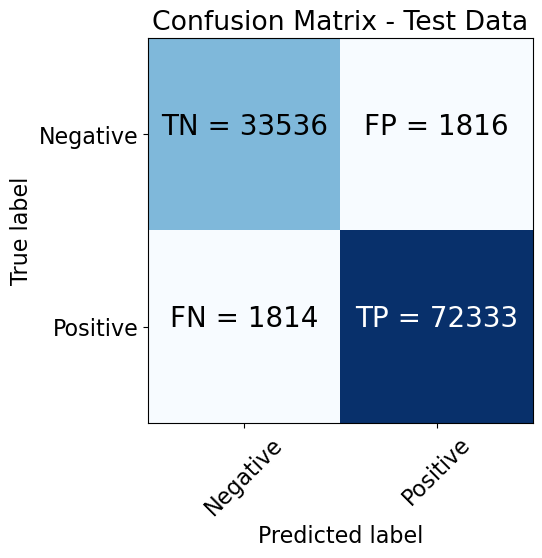

In [ ]:
## Test set
y_test_predicted = log_tf_idf.predict(X_test_std)
cm = confusion_matrix(y_test, y_test_predicted)
plt.figure(figsize=(8,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [ ]:
## Calculate precision/recall for test
print(classification_report(y_test, y_test_predicted, target_names = ['Negative = 0', 'Positive = 1']))

              precision    recall  f1-score   support

Negative = 0       0.95      0.95      0.95     35352
Positive = 1       0.98      0.98      0.98     74147

    accuracy                           0.97    109499
   macro avg       0.96      0.96      0.96    109499
weighted avg       0.97      0.97      0.97    109499



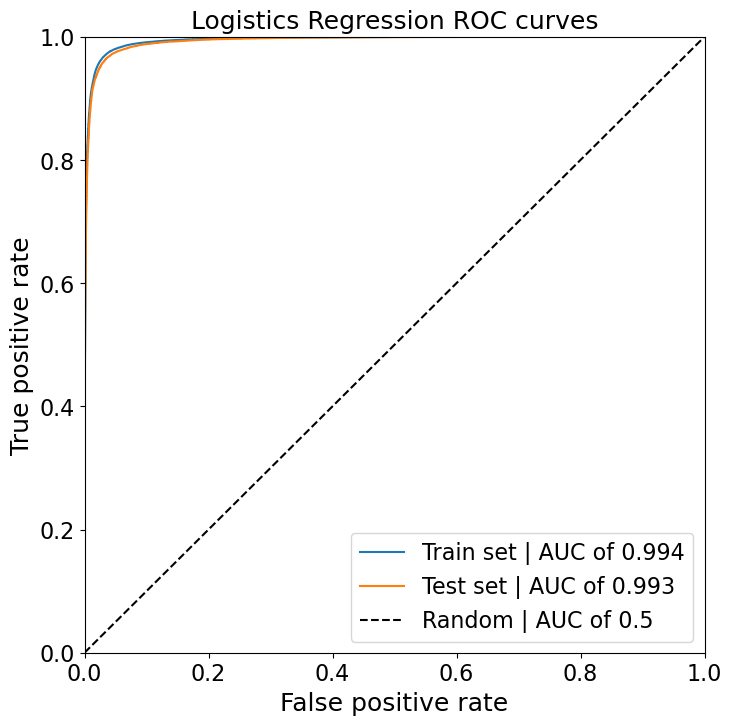

In [ ]:
## Plot ROC curves for train and test
from sklearn.metrics import roc_curve, auc
# Scores for train set
scores_train = log_tf_idf.predict_proba(X_train_std)[:, 1]
# Scores for test set
scores_test = log_tf_idf.predict_proba(X_test_std)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Logistics Regression ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

### 1.3.2 SVM Model

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
# term frequency: use TfidfVectorizer
vectorizer_tf_senti = TfidfVectorizer(max_features = 5000)
x_train_tf_idf = vectorizer_tf_senti.fit_transform(x_train)
x_test_tf_idf = vectorizer_tf_senti.transform(x_test)

In [23]:
from sklearn.model_selection import GridSearchCV
# choose the svm as the model
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

linearSVC = LinearSVC()
parameters = { 'C': [0.005, 0.010,0.025, 0.050, 0.075, 0.100, 0.50, 1.0, 5.0]}

svm_gs = GridSearchCV(linearSVC, param_grid=parameters, scoring = 'accuracy', cv=5)
best_svm = svm_gs.fit(x_train_tf_idf,y_train)
svm_pred = best_svm.predict(x_test_tf_idf)

In [24]:
from sklearn.metrics import accuracy_score
print('The accuracy score for test set using SVM is {}%'.format(round(accuracy_score(y_test,svm_pred)*100,4)))
print(svm_gs.best_params_)

The accuracy score for test set using SVM is 96.6648%
{'C': 0.5}


In [25]:
BestlinearSVC = LinearSVC(C=0.5)
best_svm= BestlinearSVC.fit(x_train_tf_idf,y_train)
pred_svm_tf_idf = best_svm.predict(x_test_tf_idf)
svm_accuracy_tf_idf = accuracy_score(y_test, pred_svm_tf_idf)
svm_f1_tf_idf = f1_score(y_test, pred_svm_tf_idf)

print('The accuracy score for TF-IDF on test set using SVM is {}%'.format(round(svm_accuracy_tf_idf*100,4)))
print('The f1 score for TF-IDF on test set using SVM is {}%'.format(round(svm_f1_tf_idf*100,4)))

The accuracy score for TF-IDF on test set using SVM is 96.6648%
The f1 score for TF-IDF on test set using SVM is 97.5362%


In [ ]:
#recall/precision
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, svm_pred))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     35352
           1       0.98      0.97      0.98     74147

    accuracy                           0.97    109499
   macro avg       0.96      0.96      0.96    109499
weighted avg       0.97      0.97      0.97    109499



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


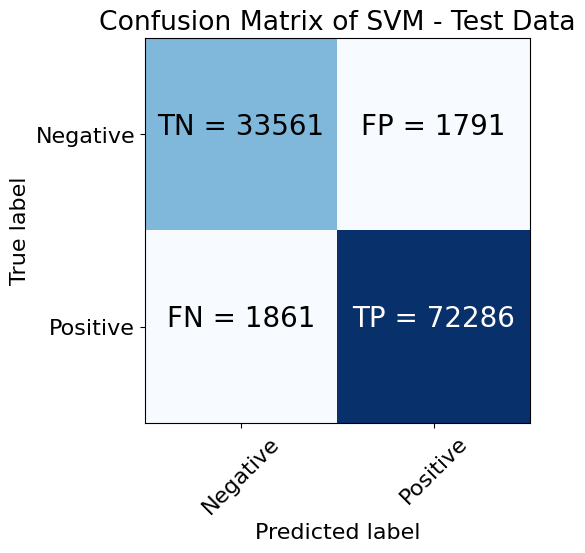

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 16})
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MaxNLocator
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of SVM - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


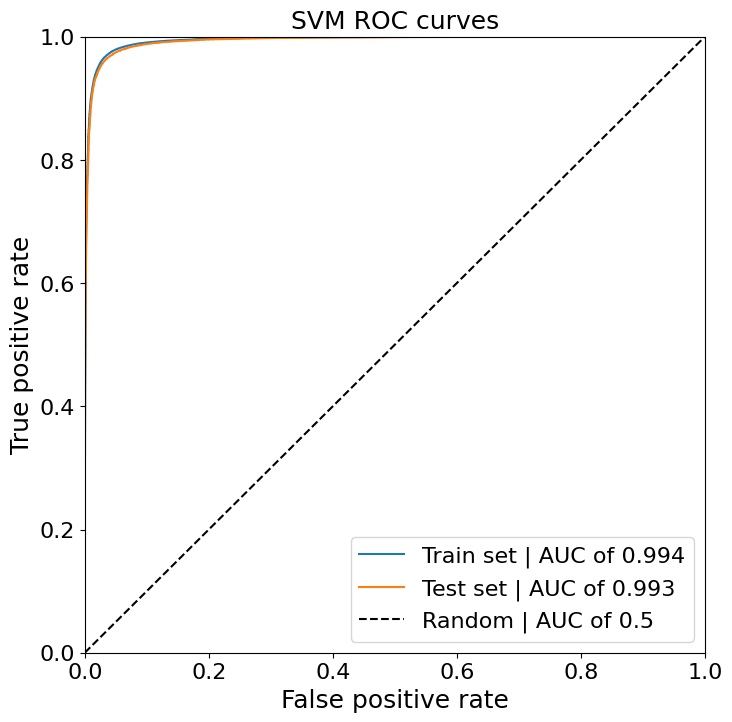

In [ ]:
## Plot ROC curves for train and test
from sklearn.metrics import roc_curve, auc
# Scores for train set
scores_train = best_svm._predict_proba_lr(x_train_tf_idf)[:, 1]
# Scores for test set
scores_test = best_svm._predict_proba_lr(x_test_tf_idf )[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('SVM ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

### 1.3.3 Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state = 1624)
parameters = { 'max_depth': [5,50,200],
                'min_samples_split': [2,4,6],
                'criterion': ["gini", "entropy"]
             }

dt_gs = GridSearchCV(dt, param_grid=parameters, scoring = 'accuracy', cv=5)
dt_gs.fit(x_train_tf_idf,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1624),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 50, 200],
                         'min_samples_split': [2, 4, 6]},
             scoring='accuracy')

In [27]:
print(dt_gs.best_params_)
dt_pred = dt_gs.predict(x_test_tf_idf)
print('The accuracy score for Big of word on test set using Decision Tree is {}%'.format(round(accuracy_score(y_test,dt_pred)*100,4)))

{'criterion': 'gini', 'max_depth': 200, 'min_samples_split': 2}
The accuracy score for Big of word on test set using Decision Tree is 94.1598%


In [28]:
from sklearn.metrics import f1_score
dt_best = DecisionTreeClassifier(random_state = 1624,max_depth=200,min_samples_split=2)
dt_best.fit(x_train_tf_idf,y_train)
print('The F1 score for Big of word on test set using Decision Tree is {}%'.format(round(f1_score(y_test, dt_pred)*100,4)))

The F1 score for Big of word on test set using Decision Tree is 95.6277%


In [ ]:
#recall/precision
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, dt_pred))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91     35352
           1       0.97      0.94      0.96     74147

    accuracy                           0.94    109499
   macro avg       0.93      0.94      0.93    109499
weighted avg       0.94      0.94      0.94    109499



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


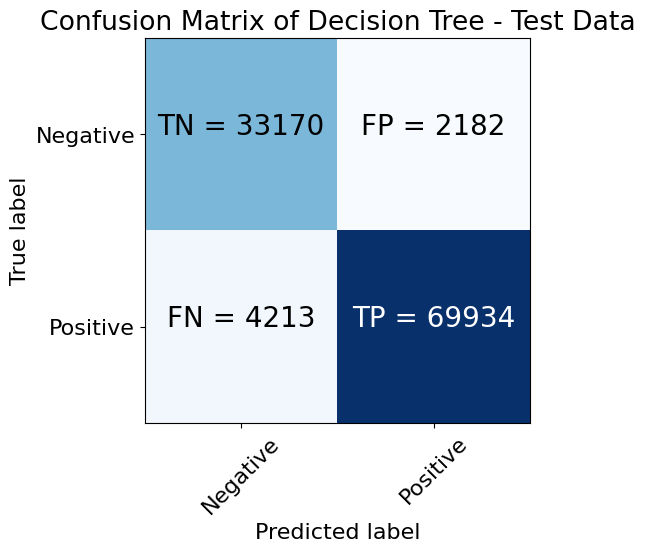

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8, 8)
matplotlib.rcParams.update({'font.size': 16})
from sklearn.metrics import roc_curve, auc
from matplotlib.ticker import MaxNLocator
cm = confusion_matrix(y_test, dt_pred)
log_tf_idf = best_svm
plt.figure(figsize=(8,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Decision Tree - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


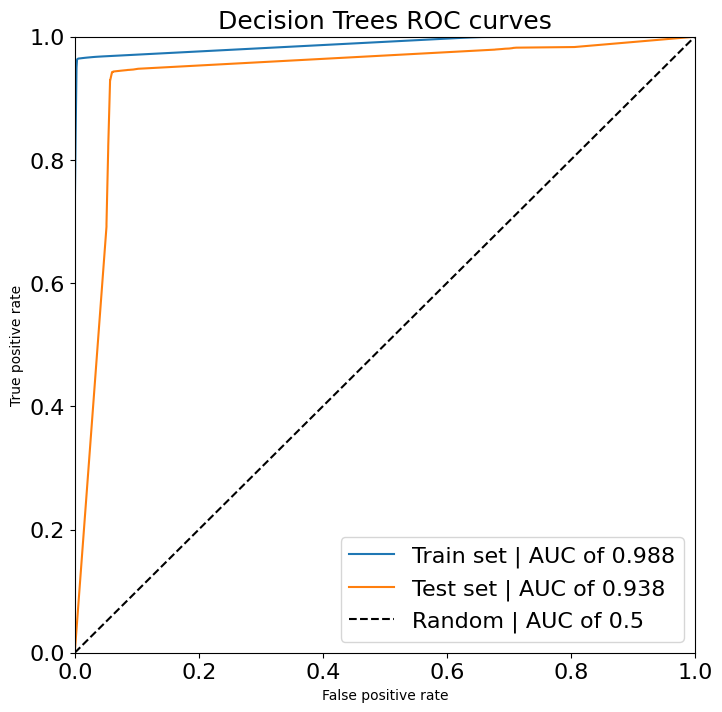

In [ ]:
## Plot ROC curves for train and test
from sklearn.metrics import roc_curve, auc
# Scores for train set
scores_train = dt_best.predict_proba(x_train_tf_idf)[:, 1]
# Scores for test set
scores_test = dt_best.predict_proba(x_test_tf_idf)[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Trees ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 10)
plt.xlabel('False positive rate', fontsize = 10)
plt.legend()
plt.show()


### 1.3.4 Random Forest

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# choose the rf as the model

rf= RandomForestClassifier()
parameters = { 'max_depth': [275,300,325]} 

rf_gs = GridSearchCV(rf, param_grid=parameters, scoring = 'accuracy', cv=5)
best_rf = rf_gs.fit(x_train_tf_idf,y_train)
rf_pred = best_rf.predict(x_test_tf_idf)

print('The accuracy score for test set using RF is {}%'.format(round(accuracy_score(y_test,rf_pred)*100,4)))
print('The f1 score for TF-IDF on test set using random forest is {}%'.format(round(f1_score(y_test, rf_pred)*100,4)))
print(rf_gs.best_params_)

The accuracy score for test set using RF is 95.4%
The f1 score for TF-IDF on test set using random forest is 96.5921%
{'max_depth': 325}


In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     35352
           1       0.97      0.96      0.97     74147

    accuracy                           0.95    109499
   macro avg       0.95      0.95      0.95    109499
weighted avg       0.95      0.95      0.95    109499



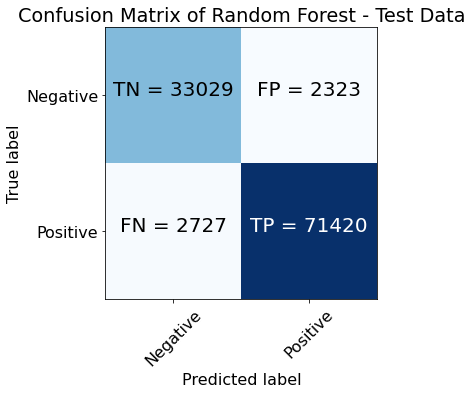

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,5))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Random Forest - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

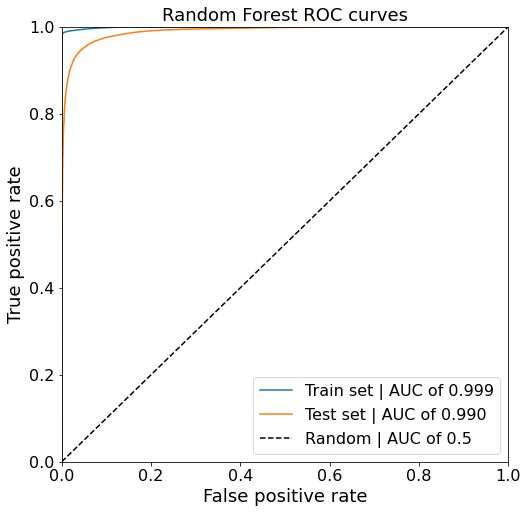

In [ ]:
## Plot ROC curves for train and test
from sklearn.metrics import roc_curve, auc
# Scores for train set
scores_train = best_rf.predict_proba(x_train_tf_idf)[:, 1]
# Scores for test set
scores_test = best_rf.predict_proba(x_test_tf_idf )[:, 1]

# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random Forest ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

In [ ]:
## model compare plot
# Model names
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

# Accuracy scores
accuracy_scores = [
    round(log_accuracy_tf_idf * 100, 4),
    round(svm_accuracy_tf_idf * 100, 4),
    round(accuracy_score(y_test, dt_pred) * 100, 4),
    round(accuracy_score(y_test, rf_pred) * 100, 4)
]

# F1 scores
f1_scores = [
    round(log_f1_tf_idf * 100, 4),
    round(svm_f1_tf_idf * 100, 4),
    round(f1_score(y_test, dt_pred) * 100, 4),
    round(f1_score(y_test, rf_pred) * 100, 4)
]

# AUC scores
auc_scores = [0.993*100, 0.993*100, 0.938*100, 0.990*100]

# Create a grouped bar plot
bar_width = 0.25
opacity = 0.8

index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(index, accuracy_scores, bar_width,
                alpha=opacity, color='yellowgreen', label='Accuracy')

rects2 = ax.bar(index + bar_width, f1_scores, bar_width,
                alpha=opacity, color='#069AF3', label='F1 Score')

rects3 = ax.bar(index + 2 * bar_width, auc_scores, bar_width,
                alpha=opacity, color='#FFD700', label='AUC')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, F1 Score, and AUC')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

# Part 2 – Sentiment classification:
Apply pre-trained Sentiment Classification Model Vader on two datasets

Apply the Trained Sentiment Classification Model from Part 1 on two datasets

Pie charts for prediction outcomes of two models on two datasets

## 2.1 dataset1: part2_russian_ukraine.csv

In [43]:
#part2_russian_ukraine.csv
part2_clean_dataset1 = pd.read_csv('part2_russian_ukraine.csv')

In [44]:
part2_clean_dataset1.isna().sum()

text    2877
dtype: int64

In [45]:
part2_clean_dataset1=part2_clean_dataset1.dropna()
part2_clean_dataset1.head()

,text
0,tell barbarian already event notwithstanding
1,last read commit almost combat ground force
2,please divide em europe use nuclear deterrent ...
3,realistically russian would fight bit enthusia...
4,usually fall kgb want die go gulag start threa...


In [46]:
part2_clean_dataset1.isna().sum()

text    0
dtype: int64

### 2.1.1 Apply vader to remove neutrual 

In [47]:
# import library
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords') 
nltk.download('vader_lexicon')
nlp = spacy.load("en_core_web_sm")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
part2_clean_dataset1

,text
0,tell barbarian already event notwithstanding
1,last read commit almost combat ground force
2,please divide em europe use nuclear deterrent ...
3,realistically russian would fight bit enthusia...
4,usually fall kgb want die go gulag start threa...
...,...
305912,war enter eighth month russian victory remain ...
305913,can not kill u live squalor forage food future...
305914,long wmd relevant
305915,tl mariupol temporarily capture invader resist...


In [49]:
def vader_func(text):
    '''
    Apply text to pre-trained sentiment analysis model VADER
    '''
    sid=SentimentIntensityAnalyzer()
    return(sid.polarity_scores(text)['compound'])

def sentiment_vader(cleaned_df):
    '''
    Apply cleaned dataset to defined vader function
    Return sentiment score and sentiment type (positive1/negative0) by classification of the model
    '''
    cleaned_df['Vader_score'] = cleaned_df['text'].apply(vader_func)
    b = []
    s = []
    for score in cleaned_df['Vader_score']:
        if score>=0.05:
            b.append(1)
        elif score<=-0.05:
            b.append(0)
        else: #Neutral
            b.append('Neutral')
    cleaned_df['Vader_predict'] = b
    
    for score in cleaned_df['Vader_score']:
        if score>=0.05:
            s.append('Positive')
        elif score<=-0.05:
            s.append('Negative')
        else: #Neutral
            s.append('Neutral')
    cleaned_df['Vader_str'] = s

In [50]:
# apply pretrained sentiment model to second dataset
sentiment_vader(part2_clean_dataset1)

In [51]:
part2_clean_dataset1_bool= part2_clean_dataset1[part2_clean_dataset1['Vader_predict'].isin(['Neutral'])==False] 
part2_clean_dataset1_bool

,text,Vader_score,Vader_predict,Vader_str
2,please divide em europe use nuclear deterrent ...,0.3182,1,Positive
3,realistically russian would fight bit enthusia...,-0.1027,0,Negative
4,usually fall kgb want die go gulag start threa...,-0.7351,0,Negative
6,superiority not dominance,0.2042,1,Positive
8,welp stand correct thank,0.3612,1,Positive
...,...,...,...,...
305911,vote happen whether like not russia try make b...,0.5423,1,Positive
305912,war enter eighth month russian victory remain ...,0.4767,1,Positive
305913,can not kill u live squalor forage food future...,0.5773,1,Positive
305915,tl mariupol temporarily capture invader resist...,0.9360,1,Positive


### 2.1.2 Apply the Trained Sentiment Classification Model from Part 1

In [52]:
# term frequency: use TfidfVectorizer
vectorizer_tf_senti = TfidfVectorizer(max_features = 5000)
x_p2_dataset1 = vectorizer_tf_senti.fit_transform(part2_clean_dataset1_bool.text)

In [57]:
pred_x_p2_dataset1 = log_tf_idf.predict(x_p2_dataset1)
part2_clean_dataset1_bool['predict'] = pred_x_p2_dataset1 
part2_clean_dataset1_bool.head()

,text,Vader_score,Vader_predict,Vader_str,predict
2,please divide em europe use nuclear deterrent ...,0.3182,1,Positive,0
3,realistically russian would fight bit enthusia...,-0.1027,0,Negative,1
4,usually fall kgb want die go gulag start threa...,-0.7351,0,Negative,0
6,superiority not dominance,0.2042,1,Positive,0
8,welp stand correct thank,0.3612,1,Positive,1


In [58]:
dataset1_vader= part2_clean_dataset1['Vader_str'].value_counts(ascending=True).to_frame()
dataset1_vader_bool= part2_clean_dataset1_bool['Vader_str'].value_counts(ascending=True).to_frame()
dataset1_logistic_bool= part2_clean_dataset1_bool['predict'].value_counts(ascending=True).to_frame()

Text(0.5, 0, 'Comparisons (dataset1)')

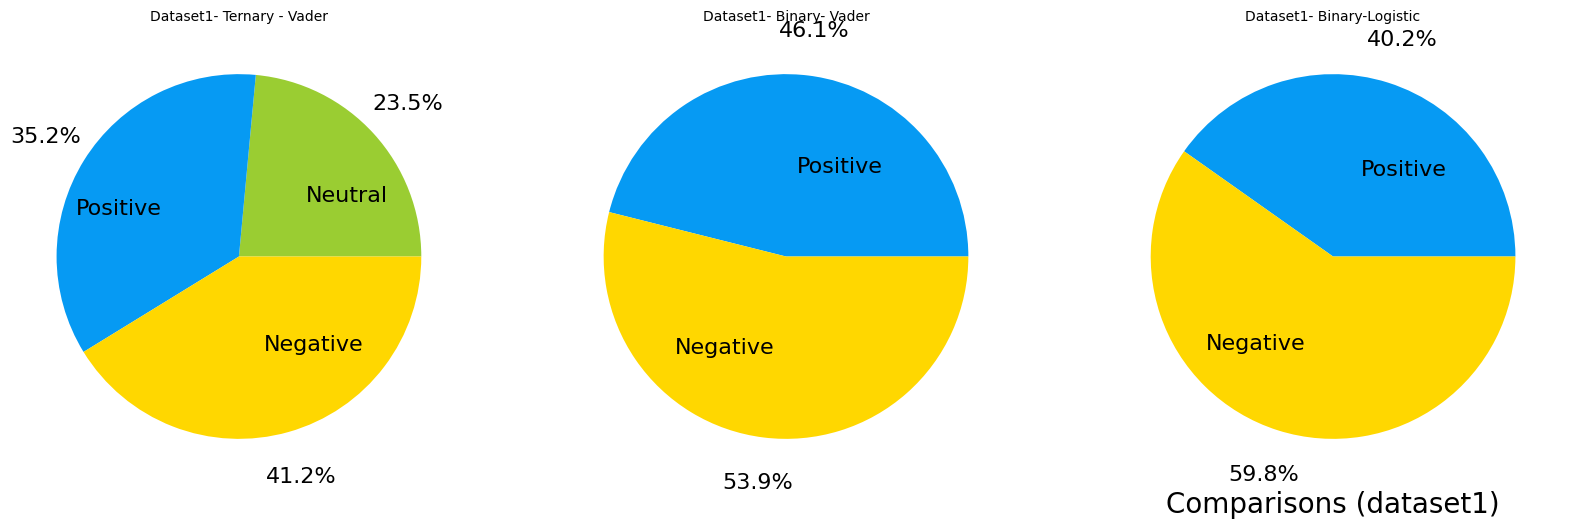

In [59]:
fig, axes = plt.subplots(1, 3,figsize=(20, 10))
axes[0].pie(dataset1_vader['Vader_str'], labels=dataset1_vader.index, autopct='%1.1f%%', colors = ['yellowgreen','#069AF3','#FFD700'],
            pctdistance=1.25, labeldistance=0.5)
axes[0].set_title('Dataset1- Ternary - Vader',fontsize=10)

axes[1].pie(dataset1_vader_bool['Vader_str'], labels=dataset1_vader_bool.index, autopct='%1.1f%%',colors = ['#069AF3','#FFD700'],
       pctdistance=1.25, labeldistance=.5)
axes[1].set_title('Dataset1- Binary- Vader',fontsize=10)

axes[2].pie(dataset1_logistic_bool['predict'], labels=['Positive','Negative'], autopct='%1.1f%%',colors = ['#069AF3','#FFD700'],
       pctdistance=1.25, labeldistance=.5)
axes[2].set_title('Dataset1- Binary-Logistic',fontsize=10)


plt.xlabel('Comparisons (dataset1)', fontsize=20)


We choose Logistic Regression, C= 0.01 as our optimal model.

## 2.2 dataset2: part2_reddit_ukraine_russia.cvs

In [60]:
# part2_reddit_ukraine_russia.csv
part2_clean_dataset2 = pd.read_csv('part2_reddit_ukraine_russia.csv')

In [61]:
# check nan value
part2_clean_dataset2.isna().sum()

text    140
dtype: int64

In [62]:
part2_clean_dataset2 =part2_clean_dataset2.dropna()
part2_clean_dataset2.head()

,text
0,hello u hjgbuijhgh community focus important v...
1,uhm that s quite increase also hear recently t...
2,poland also announce plan double armed force k...
3,remember nato know tell that s alarming amount...
4,well do putin top salesman nato stupid cruel w...


In [63]:
part2_clean_dataset2.isna().sum()

text    0
dtype: int64

### 2.2.1 Apply vader to remove neutrual 

In [64]:
# apply pretrained sentiment model to second dataset
sentiment_vader(part2_clean_dataset2)
part2_clean_dataset2

,text,Vader_score,Vader_predict,Vader_str
0,hello u hjgbuijhgh community focus important v...,0.9287,1,Positive
1,uhm that s quite increase also hear recently t...,-0.0018,Neutral,Neutral
2,poland also announce plan double armed force k...,0.6908,1,Positive
3,remember nato know tell that s alarming amount...,0.2500,1,Positive
4,well do putin top salesman nato stupid cruel w...,-0.9819,0,Negative
...,...,...,...,...
16595,not region wanna practice russian brain drain ...,-0.3400,0,Negative
16596,estonia far usa usa russian one many emigrant ...,-0.2960,0,Negative
16597,russian jump hoop acquire estonian passport,0.0000,Neutral,Neutral
16598,point russia invade anyone want reason whatsoe...,-0.2732,0,Negative


In [65]:
# For better classification of our svm model on text, 
# we drop neutral observations predicted by pre-trained sentiment classification model
part2_clean_dataset2_bool= part2_clean_dataset2[part2_clean_dataset2['Vader_predict'].isin(['Neutral'])==False] 
part2_clean_dataset2_bool

,text,Vader_score,Vader_predict,Vader_str
0,hello u hjgbuijhgh community focus important v...,0.9287,1,Positive
2,poland also announce plan double armed force k...,0.6908,1,Positive
3,remember nato know tell that s alarming amount...,0.2500,1,Positive
4,well do putin top salesman nato stupid cruel w...,-0.9819,0,Negative
5,good decision russian incapable understanding ...,0.5859,1,Positive
...,...,...,...,...
16594,not even mother favourite language moan ukrainian,-0.1531,0,Negative
16595,not region wanna practice russian brain drain ...,-0.3400,0,Negative
16596,estonia far usa usa russian one many emigrant ...,-0.2960,0,Negative
16598,point russia invade anyone want reason whatsoe...,-0.2732,0,Negative


### 2.2.2 Apply the Trained Sentiment Classification Model from Part 1

In [66]:
# term frequency: use TfidfVectorizer
vectorizer_tf_senti = TfidfVectorizer(max_features = 5000)
x_p2_dataset2 = vectorizer_tf_senti.fit_transform(part2_clean_dataset2_bool.text)

In [74]:
# prediction of best SVM model on dataset2 with neutral text deleted
pred_x_p2_dataset2 = log_tf_idf.predict(x_p2_dataset2)
part2_clean_dataset2_bool['predict'] = pred_x_p2_dataset2 
part2_clean_dataset2_bool.head()

,text,Vader_score,Vader_predict,Vader_str,predict
0,hello u hjgbuijhgh community focus important v...,0.9287,1,Positive,0
2,poland also announce plan double armed force k...,0.6908,1,Positive,0
3,remember nato know tell that s alarming amount...,0.2500,1,Positive,1
4,well do putin top salesman nato stupid cruel w...,-0.9819,0,Negative,1
5,good decision russian incapable understanding ...,0.5859,1,Positive,0


In [75]:
dataset2_vader= part2_clean_dataset2['Vader_str'].value_counts(ascending=True).to_frame()
dataset2_vader_bool= part2_clean_dataset2_bool['Vader_str'].value_counts(ascending=True).to_frame()
dataset2_logistic_bool= part2_clean_dataset2_bool['predict'].value_counts(ascending=True).to_frame()

Text(0.5, 0, 'Comparisons (dataset2)')

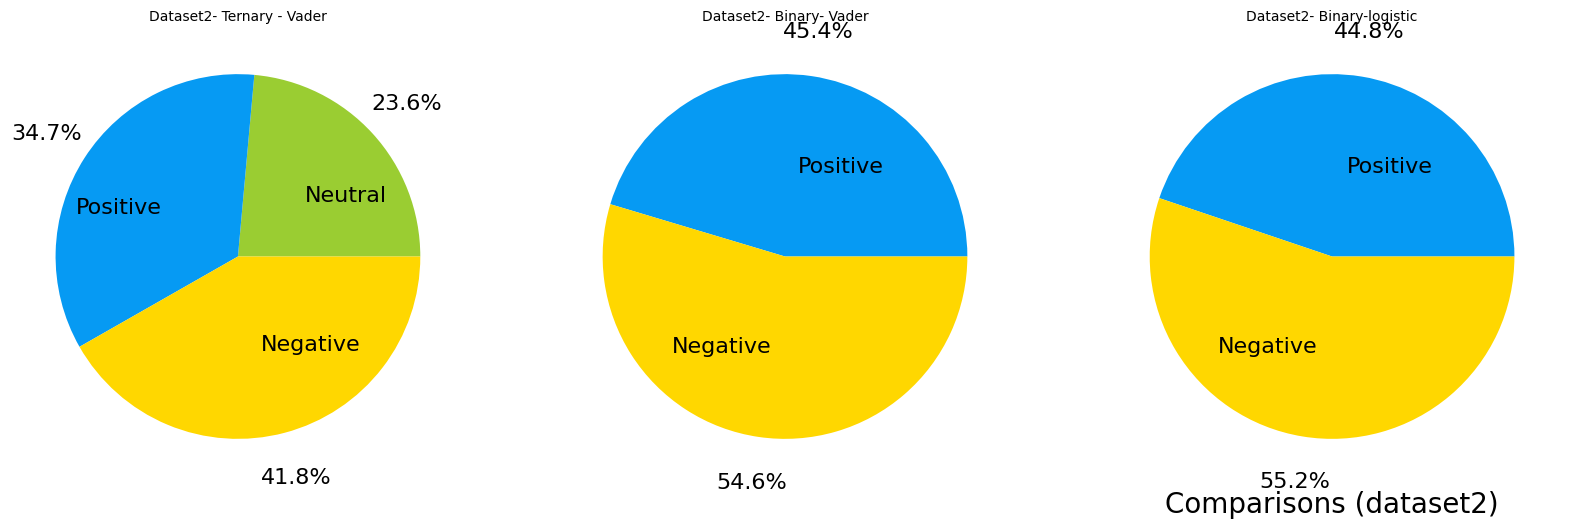

In [76]:
fig, axes = plt.subplots(1, 3,figsize=(20, 10))
axes[0].pie(dataset2_vader['Vader_str'], labels=dataset2_vader.index, autopct='%1.1f%%', colors = ['yellowgreen','#069AF3','#FFD700'],
            pctdistance=1.25, labeldistance=0.5)
axes[0].set_title('Dataset2- Ternary - Vader',fontsize=10)

axes[1].pie(dataset2_vader_bool['Vader_str'], labels=dataset2_vader_bool.index, autopct='%1.1f%%',colors = ['#069AF3','#FFD700'],
       pctdistance=1.25, labeldistance=.5)
axes[1].set_title('Dataset2- Binary- Vader',fontsize=10)

axes[2].pie(dataset2_logistic_bool['predict'], labels=['Positive','Negative'], autopct='%1.1f%%',colors = ['#069AF3','#FFD700'],
       pctdistance=1.25, labeldistance=.5)
axes[2].set_title('Dataset2- Binary-logistic',fontsize=10)


plt.xlabel('Comparisons (dataset2)', fontsize=20)


# Part 3 – Factor and topics identification via Machine Learning

### Use NMF to explore positive&negative topics for Russia and Ukraine
### 3.2.1 Positive WordCloud + Intertopic Distance Map for First dataset
### 3.2.2 Negative  WordCloud + Intertopic Distance Map for First dataset
### 3.2.3 Positive  WordCloud + Intertopic Distance Map for Second dataset
### 3.2.4 Negative  WordCloud + Intertopic Distance Map for Second dataset

#### NMF Model

In [ ]:
# !pip install transformers
# !pip install torch
# !pip install nltk
# !pip install praw
# !pip install requests

In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
# import praw
from nltk import FreqDist
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from PIL import Image
import requests

In [ ]:
df_p3 = pd.read_csv("ukraine_russia_all.csv")
df_p3

,text,Vader_score,Vader_predict,Vader_str,svm_predict
0,please divide em europe use nuclear deterrent ...,0.3182,1,Positive,0
1,realistically russian would fight bit enthusia...,-0.1027,0,Negative,1
2,usually fall kgb want die go gulag start threa...,-0.7351,0,Negative,0
3,superiority not dominance,0.2042,1,Positive,0
4,welp stand correct thank,0.3612,1,Positive,1
...,...,...,...,...,...
244331,not even mother favourite language moan ukrainian,-0.1531,0,Negative,1
244332,not region wanna practice russian brain drain ...,-0.3400,0,Negative,1
244333,estonia far usa usa russian one many emigrant ...,-0.2960,0,Negative,1
244334,point russia invade anyone want reason whatsoe...,-0.2732,0,Negative,0


In [ ]:
# Filter the DataFrame where 'text' column contains any of the specified keywords for Russia
keywords_russia = ['russia', 'russian', 'putin', 'vladimir']
pattern_russia = '|'.join(keywords_russia)
df_p3_russia = df_p3[df_p3['text'].str.contains(pattern_russia, case=False)]
#filter based on positive comments for Russia
positive_df_russia = df_p3_russia[df_p3_russia['predict'] == 1]


# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

tfidf_matrix_positive = vectorizer.fit_transform(positive_df_russia['text'])



In [ ]:
# Apply NMF to extract topics
n_topics = 25
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(tfidf_matrix_positive)
# Print top words per topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topic_list= []
features_list = []
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    topic_list.append(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    features_list.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #1:
russia happen term leave yes sanction world year fuck history

Topic #2:
putin need suck long boy fuck criminal great power duma

Topic #3:
russian soldier account speak number ban history true pro guess

Topic #4:
gas germany oil buy price money energy cut german country

Topic #5:
ukraine help president weapon fight send crimea moldova attack make

Topic #6:
war crime year declare world criminal soldier genocide mean commit

Topic #7:
missile ship need air fly range use cruise hit aircraft

Topic #8:
think really point care clearly reason good yeah stupid wrong

Topic #9:
nuclear weapon use power tactical matter arsenal trigger chemical strike

Topic #10:
propaganda believe news fake population russian anti actually spread information

Topic #11:
ukrainian force pretty video conflict help intelligence russian speak sure

Topic #12:
nato country join happen member finland security try eu west

Topic #13:
want country guy matter avoid break reason stop stay pocket

Topic #14:

#### positive topics for Russia

In [ ]:
df_russia_pos = pd.DataFrame({'Topic' : topic_list, 'Top 10 Key Words': features_list})
df_russia_pos

,Topic,Top 10 Key Words
0,Topic #1:,russia happen term leave yes sanction world ye...
1,Topic #2:,putin need suck long boy fuck criminal great p...
2,Topic #3:,russian soldier account speak number ban histo...
3,Topic #4:,gas germany oil buy price money energy cut ger...
4,Topic #5:,ukraine help president weapon fight send crime...
5,Topic #6:,war crime year declare world criminal soldier ...
6,Topic #7:,missile ship need air fly range use cruise hit...
7,Topic #8:,think really point care clearly reason good ye...
8,Topic #9:,nuclear weapon use power tactical matter arsen...
9,Topic #10:,propaganda believe news fake population russia...


In [ ]:
#filter based on negative comments for Russia
negative_df_russia = df_p3_russia[df_p3_russia['predict'] == 0]

# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_negative = vectorizer.fit_transform(negative_df_russia['text'])

# Apply NMF to extract topics
n_topics = 25
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(tfidf_matrix_negative)

# Print top words per topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

topic_list= []
features_list = []
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    topic_list.append(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    features_list.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #1:
russia mean support leave soviet bad love fight big pay

Topic #2:
fuck warship troll bot em cunt fucking really chechen poland

Topic #3:
russian propaganda leave troll die pro army warship lot nazi

Topic #4:
putin trump try die anti hope look biden power tell

Topic #5:
ukraine invade support destroy troop free invasion crimea weapon push

Topic #6:
war start crime declare wage commit fight proxy stop criminal

Topic #7:
say day thing biden believe read right article state government

Topic #8:
nato join attack member eu border threat fight help poland

Topic #9:
like look sound act make feel old year bad thing

Topic #10:
germany gas oil stop buy import german europe eu economy

Topic #11:
people support hate bad pro make blame stop really fucking

Topic #12:
want lot let probably dead anymore die hear land actually

Topic #13:
world rest live place long life safe make hate leave

Topic #14:
kill soldier civilian rape child dead innocent death russian nazi

Topic #15:
chi

#### Negative topics for Russia

In [ ]:
df_russia_neg = pd.DataFrame({'Topic' : topic_list, 'Top 10 Key Words': features_list})
df_russia_neg

,Topic,Top 10 Key Words
0,Topic #1:,russia mean support leave soviet bad love figh...
1,Topic #2:,fuck warship troll bot em cunt fucking really ...
2,Topic #3:,russian propaganda leave troll die pro army wa...
3,Topic #4:,putin trump try die anti hope look biden power...
4,Topic #5:,ukraine invade support destroy troop free inva...
5,Topic #6:,war start crime declare wage commit fight prox...
6,Topic #7:,say day thing biden believe read right article...
7,Topic #8:,nato join attack member eu border threat fight...
8,Topic #9:,like look sound act make feel old year bad thing
9,Topic #10:,germany gas oil stop buy import german europe ...


In [ ]:
keywords_ukraine = ['ukraine','ukrainian','zelenskyy','volodymyr']
pattern_ukraine = '|'.join(keywords_ukraine)
df_p3_ukraine = df_p3[df_p3['text'].str.contains(pattern_ukraine,case=False)]

#filter based on positive comments for Ukraine
positive_df_ukraine = df_p3_ukraine[df_p3_ukraine['predict'] == 1]

# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_positive_ukraine = vectorizer.fit_transform(positive_df_ukraine['text'])
# Apply NMF to extract topics
n_topics = 25
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(tfidf_matrix_positive_ukraine)

# Print top words per topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

topic_list= []
features_list = []
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    topic_list.append(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    features_list.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #1:
people support kill genocide million suffer believe government population really

Topic #2:
ukrainian speak yeah maybe polish farmer love pretty video army

Topic #3:
germany german weapon send gas pay heavy provide government buy

Topic #4:
missile aircraft air fly receive mig ship anti fleet cruise

Topic #5:
russian propaganda army number pro state dead lot read military

Topic #6:
think good ukraine win really guy know way kind man

Topic #7:
nato poland army member join lose maybe end response offensive

Topic #8:
war crime commit ukraine declare world lavrov end good win

Topic #9:
putin happen president great negotiate defeat invade order way ukraine

Topic #10:
russia ukraine military right make sanction stop leave control situation

Topic #11:
soldier civilian kill stupid let pow dead army thing life

Topic #12:
want guy gun ukraine believe manpad current matter right die

Topic #13:
like nazi look ukraine time make bad invasion fuck day

Topic #14:
india china west 

#### Positive topics for Ukraine

In [ ]:
df_ukraine_pos = pd.DataFrame({'Topic' : topic_list, 'Top 10 Key Words': features_list})
df_ukraine_pos

,Topic,Top 10 Key Words
0,Topic #1:,people support kill genocide million suffer be...
1,Topic #2:,ukrainian speak yeah maybe polish farmer love ...
2,Topic #3:,germany german weapon send gas pay heavy provi...
3,Topic #4:,missile aircraft air fly receive mig ship anti...
4,Topic #5:,russian propaganda army number pro state dead ...
5,Topic #6:,think good ukraine win really guy know way kin...
6,Topic #7:,nato poland army member join lose maybe end re...
7,Topic #8:,war crime commit ukraine declare world lavrov ...
8,Topic #9:,putin happen president great negotiate defeat ...
9,Topic #10:,russia ukraine military right make sanction st...


In [ ]:
#filter based on negative comments for Ukraine
negative_df_ukraine = df_p3_ukraine[df_p3_ukraine['predict'] == 0]

# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_negative_ukraine = vectorizer.fit_transform(negative_df_ukraine['text'])

# Apply NMF to extract topics
n_topics = 25
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(tfidf_matrix_negative_ukraine)

# Print top words per topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

topic_list= []
features_list = []
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    topic_list.append(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    features_list.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #1:
policy moderator comment discord compose rulebreake bigotry slogan server violator

Topic #2:
russia ukraine invade china make bad sanction turn west big

Topic #3:
tnx boop beep spelling downvote kiev understand consider kyiv support

Topic #4:
russian troop pro soldier kill number medium speak people belarus

Topic #5:
weapon nuclear ukraine heavy chemical deliver yes buy let supply

Topic #6:
nato join ukraine border eu member poland ally push think

Topic #7:
ukrainian pow kill wonder soldier fight like rape way child

Topic #8:
war ukraine start fight declare crime profit make new lose

Topic #9:
putin slava invade world ukraine launch life vote trump hell

Topic #10:
say people video reason like soviet blame plan defender right

Topic #11:
submission follow remove discussion post message dmy writing issue sub

Topic #12:
hope win really true ukraine soon europe shit going victory

Topic #13:
air missile ship hit anti range ukraine plane launch superiority

Topic #14:
fu

#### Negative topics for Ukraine

In [ ]:
df_ukraine_neg = pd.DataFrame({'Topic' : topic_list, 'Top 10 Key Words': features_list})
df_ukraine_neg

,Topic,Top 10 Key Words
0,Topic #1:,policy moderator comment discord compose ruleb...
1,Topic #2:,russia ukraine invade china make bad sanction ...
2,Topic #3:,tnx boop beep spelling downvote kiev understan...
3,Topic #4:,russian troop pro soldier kill number medium s...
4,Topic #5:,weapon nuclear ukraine heavy chemical deliver ...
5,Topic #6:,nato join ukraine border eu member poland ally...
6,Topic #7:,ukrainian pow kill wonder soldier fight like r...
7,Topic #8:,war ukraine start fight declare crime profit m...
8,Topic #9:,putin slava invade world ukraine launch life v...
9,Topic #10:,say people video reason like soviet blame plan...


In [ ]:
#By combining the two countries and analyze the positive and negative sentences.
positive_df = df_p3[df_p3['predict'] == 1]
positive_df


,text,Vader_score,Vader_predict,Vader_str,svm_predict
1,realistically russian would fight bit enthusia...,-0.1027,0.0,Negative,1.0
4,welp stand correct thank,0.3612,1.0,Positive,1.0
5,sign hague convention not cover similar mechan...,0.4404,1.0,Positive,1.0
6,would nice start shit gold brick engrave fuck ...,-0.2263,0.0,Negative,1.0
8,care other actually one start whataboutism mor...,0.7003,1.0,Positive,1.0
...,...,...,...,...,...
21865,wow glock could reach far sigh,0.6124,1.0,Positive,1.0
21866,yes yes everyone distance sanction russia uran...,0.3612,1.0,Positive,1.0
21872,agree exception child life important,0.5106,1.0,Positive,1.0
21874,please check first see block post not like pos...,-0.4039,0.0,Negative,1.0


In [ ]:
# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_positive = vectorizer.fit_transform(positive_df['text'])

#### Positive topics

In [ ]:
# Apply NMF to extract topics
n_topics = 25
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(tfidf_matrix_positive)

# Print top words per topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Topic #1:
day tank number time equipment ship military use missile yes

Topic #2:
amp page canonical controversial amputatorbot privacy summon check web link

Topic #3:
like sound look try feel american video guy kind stuff

Topic #4:
russian soldier army military force speak pro ban state invasion

Topic #5:
think care way really point stop actually yeah happen long

Topic #6:
war crime criminal commit fight cold declare happen start end

Topic #7:
people say kill thing live government lot happen support million

Topic #8:
putin suck trump need fuck long president plan power fail

Topic #9:
ukraine nato send help need weapon support attack poland aid

Topic #10:
ukrainian soldier fight force say kill video speak army yeah

Topic #11:
russia say west china sanction term world nuke nato leave

Topic #12:
bad guy feel sad mean thing kid agree soviet idea

Topic #13:
good stuff idea thing wish man sound way yeah luck

Topic #14:
shit holy piece stupid oh fucking eat say really fuck

Topic

#### Negative topics

In [ ]:
#Examine topics in the negative comments

negative_df = df_p3[df_p3['predict'] == 0]
# Extract features using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_positive = vectorizer.fit_transform(negative_df['text'])

# Apply NMF to extract topics
n_topics = 25
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(tfidf_matrix_positive)

# Print top words per topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


Topic #1:
moderator policy comment bot review violator rulebreake server stereotype discord

Topic #2:
russia china nuke world lose west sanction invade bad country

Topic #3:
good bot point luck job man thing idea start work

Topic #4:
thank ok interesting read info point ah clarification article appreciate

Topic #5:
fuck em warship man troll face fucking cunt nah putler

Topic #6:
yes ah exactly hell mean year work absolutely sorry definitely

Topic #7:
like look sound act thing old year problem guy feel

Topic #8:
russian soldier kill ukrainian propaganda army dead force troop nazi

Topic #9:
war start world crime criminal end nuclear lose fight declare

Topic #10:
say thing wrong article day believe pretty medium fair point

Topic #11:
ukraine weapon send help support use tank lose think troop

Topic #12:
hope right let ukrainian really soon come time happen safe

Topic #13:
putin trump think kill try biden power tell probably anti

Topic #14:
make sense hard mistake lose point mo

#### 3.1 Wordcloud Function

In [ ]:
def cloud_image(df_text, mask, plot_title):
    stopwords = set(STOPWORDS)
    stopwords = STOPWORDS.update({'russia','ukraine','think','russian','subreddit','moderator', 'question','automatically','contact','compose',
                                  'say', 'conflict', 'putin', 'people','say','u','go','perform','ukrainian'})

    text = " ".join(comments for comments in df_text.text)
    image_colors = ImageColorGenerator(mask)
    
    wordcloud = WordCloud(stopwords=stopwords, max_words=300, mask = mask, background_color="white").generate(text)

    image_colors = ImageColorGenerator(mask)

    fig=plt.figure(figsize=(16, 10))
    plt.axis("off")
    plt.title(plot_title)
    plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")

    plt.show()

In [ ]:
# !pip install requests

In [ ]:
from PIL import Image
import requests
# use image from internet
map_url = 'https://img.fruugo.com/product/6/39/216398396_max.jpg'

image_map = Image.open(requests.get(map_url, stream = True).raw).convert('RGB')

In [ ]:
# Change background to [255, 255, 255] for masking
def backcolor(mk):
    for i in range(mk.shape[0]):
        for j in range(mk.shape[1]):
            if mk[i][j].sum() == 0:
                mk[i][j] = [255, 255, 255]
    return mk

In [ ]:
map_mask = backcolor(np.array(image_map))

# Part4
### Combined Positive and Negative sentiment wordcloud

### 4.1 Combined Positive Result

In [ ]:
keywords_ukraine = ['ukraine','ukrainian','zelenskyy','volodymyr']
pattern_ukraine = '|'.join(keywords_ukraine)
df_p3_ukraine = df_p3[df_p3['text'].str.contains(pattern_ukraine,case=False)]

#filter based on positive comments for Ukraine
positive_df_ukraine = df_p3_ukraine[df_p3_ukraine['predict'] == 1]

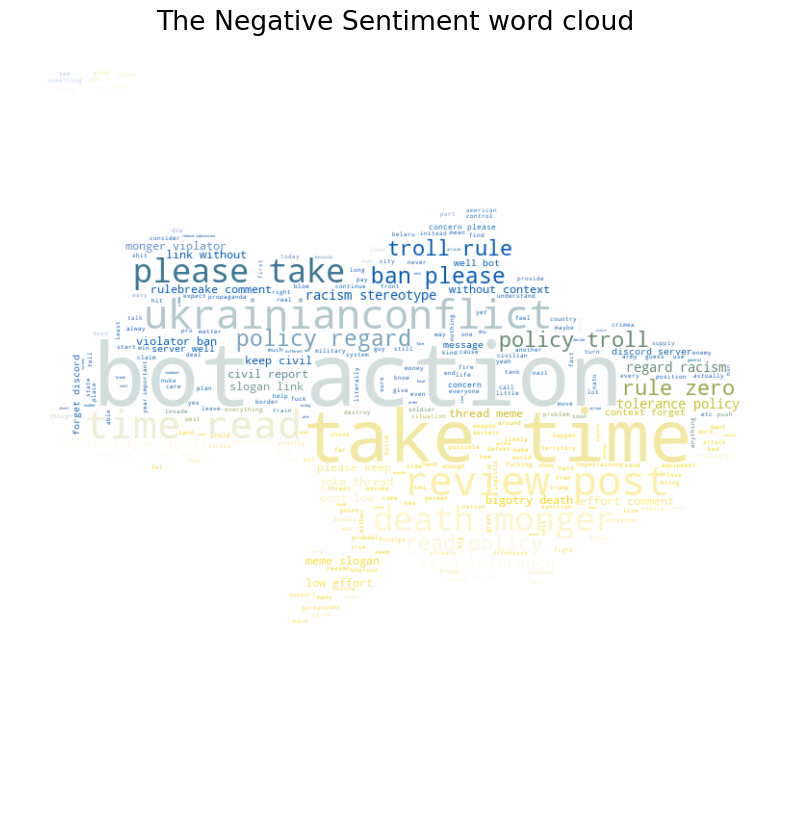

In [ ]:
#filter based on negative comments for Ukraine
neg_df_ukraine = df_p3_ukraine[df_p3_ukraine['predict'] == 0]
cloud_image(neg_df_ukraine, map_mask, 'The Negative Sentiment word cloud')

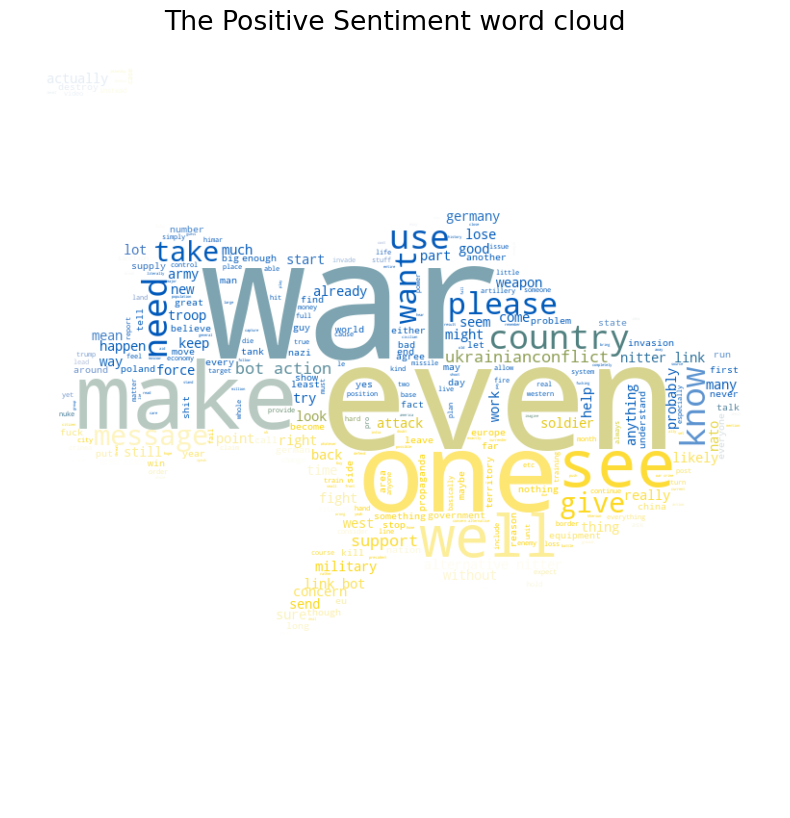

In [ ]:
cloud_image(positive_df_ukraine, map_mask, 'The Positive Sentiment word cloud')